# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: Franco, Andrea Rose \
_Student No._: 2021-06793\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ANDREA ROSE V. FRANCO**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

In [233]:
import networkx as nx

# **NETWORKS**

Complex systems, such as society, ecosystem, and the nervous system, are pretty much common in our everyday lives. These networks are usually modeled as what we call **graphs**, which are set of nodes connected by edges. If it is hard to visualize, imagine a graph as a network map.

**Fundamental elements of a graph**

For our example of society as a complex system, each person in that society represents a **node/actor**. The social connections or interactions such as friendships and relationships of each person to another are the **edges/links**.

Of course, these connections may be one-sided or not. If the connections goes both ways, this is called an **Undirected Graph**. If the connections are one-sided or have a direction, it is called a **Directed Graph**.

In this module, we mainly focus on **Undirected Graphs**. To know more, we can start by generating an undirected network.


**NetworkX**

We will be mainly using the NetworkX package as it has a set of generators for graphs. To check for the version of the NetworkX:

In [234]:
nx.__version__

'3.3'

**Network Generation**

We define a social network of friends as shown in https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link.

The graph G can be generated either by adding a node at a time or an edge at a time. In this module, I manually added their edges in the `edges_to_add` array.

Nodes: 10
Edges: 18


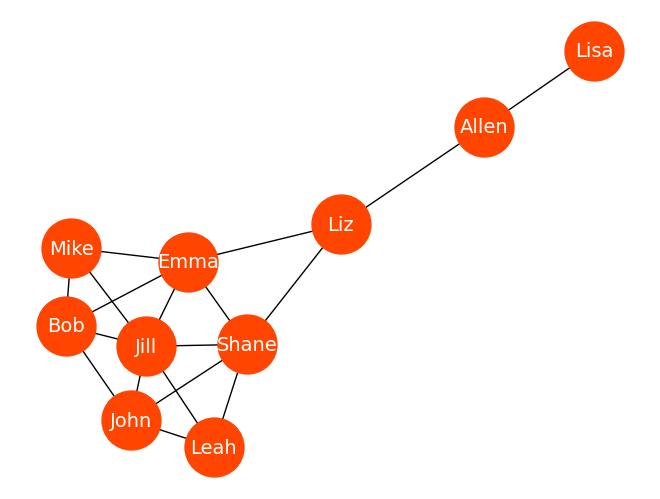

In [298]:
#Initialize Graph
G = nx.Graph()

#Manually adding edges based on the example shown
edges_to_add = [('Jill', 'Mike'), ('Jill', 'Leah'), ('Jill', 'Bob'), ('Jill', 'Emma'), ('Jill', 'John'), ('Jill', 'Shane'), ('Bob', 'Emma'), ('John', 'Shane'),
                ('Liz', 'Emma'), ('Emma', 'Mike'), ('Mike', 'Bob'), ('Bob', 'John'), ('John', 'Leah'), ('Leah', 'Shane'), ('Shane', 'Emma'), ('Shane', 'Liz'),
                ('Liz', 'Allen'), ('Allen', 'Lisa')]
G.add_edges_from(edges_to_add)

#Check the number of nodes and edges
print(f'Nodes: {G.number_of_nodes()}')
print(f'Edges: {G.number_of_edges()}')

#Visualization of Graph
nx.draw(G,
        with_labels=True,
        node_color='orangered',
        node_size=1800,
        font_color='white',
        font_size=14,
        )

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

# **CENTRALITY MEASURES**

## **Centrality Measures using NetworkX**
NetworkX provides us with functions that measures the centrality of networks. These centrality measures help us in understanding the connections between nodes better. We can call them as metric of our networks as it is helpful in identifying key players in a given network.

In this part, we can summarize some of the common centrality measures using NetworkX:

In [236]:
import pandas as pd
import numpy as np

In [237]:
#Centrality using NetworkX
centrality_measures = {
    'Degree Centrality': nx.degree_centrality(G),
    'Betweenness Centrality': nx.betweenness_centrality(G),
    'Closeness Centrality': nx.closeness_centrality(G)}

df = pd.DataFrame(centrality_measures)
display(df)

,Degree Centrality,Betweenness Centrality,Closeness Centrality
Jill,0.666667,0.101852,0.600000
Mike,0.333333,0.000000,0.500000
Leah,0.333333,0.000000,0.500000
Bob,0.444444,0.023148,0.529412
Emma,0.555556,0.231481,0.642857
John,0.444444,0.023148,0.529412
Shane,0.555556,0.231481,0.642857
Liz,0.333333,0.388889,0.600000
Allen,0.222222,0.222222,0.428571
Lisa,0.111111,0.000000,0.310345


## **Centrality Measure Results**

### **Degree Centrality**
The **degree centrality** is the measure of the number of connections each node has in a network. The higher the degree centrality, the more connections it has. From the network, we can visually observe that Jill has a lot of connections. This is also supported by its measure of degree centrality with a value of 0.6667 in comparison to the other actors in the network. The actor with the lowest degree centrality is Lisa, with a value of 0.1111. This is understood as it only has one connection which is Allen.

### **Betweenness Centrality**
The **betweenness centrality** is the measure of how often a node/actor is found in the shortest path between two other nodes/actors in the network. A high betweenness corresponds to storage of information or resources. In the results, we can see that the node with the highest betweenness centraliy is Liz. Visually, we can observe this since when we have Allen or Lisa as a source/target, they all have to pass by Liz. On the other hand, the node with the lowest betweenness centrality is Mike, Lisa, Leah with a value of 0. Lisa is at the edge of the Graph, and thus, could not be passed by any shortest path between two actors. The same with Mike and Leah, despite being connected with two other nodes, their shortest path both does not involve passing through Mike and Leah.

### **Closeness Centrality**
The **closenesss centrality** is measure of the closeness/distance of a node to other nodes in the network. A high closeness centrality indicates that these nodes can easily communicate with others in comparison to the others. This means that they need to travel less in the network in order to reach other nodes. In the results, we can see that the node with the highest closeness centrality is Emma and Shane. Visually, we can see that both of them are located in the center of the nextwork. In comparison to Lisa with a low closeness centrality which is at the edge of the network.

## **Centrality Measures through manual code**

Now, we actually took the easy way in obtaining the centrality measures since we are provided by the NetworkX library. To further understand these measures, we can delve deeper by manually getting these measures and understanding how they work.

**Degree Centrality**

The degree centrality is defined by

$C_{D}(n) = \frac{deg(n)}{g-1}$

where g is the number of nodes and deg(n) is the number of nodes connected to node n. Thus we define a function:

In [238]:
def get_degcent(G):
    deg_centrality = {} #Store the values
    for n in G.nodes(): #For each node
        deg_centrality[n] = len(list(G.neighbors(n)))/(len(G.nodes()) - 1) #Number of nodes connected to n over the total number of nodes - 1
    return deg_centrality

**Betweenness Centrality**

The betweenness centrality is defined by

$C_{B}(n_i) = \sum\frac{g_{jk}(n_i)}{g_{jk}}$

where $\frac{g_{jk}(n_i)}{g_{jk}}$ is the probability that distinct actor $n_i$ is in communication between two actors $n_j$ and $n_k$

In [296]:
def get_betweenness_centrality(G):
    betweenness = {node: 0.0 for node in G.nodes()}

    #For each node n, there is a pair of nodes: source and target
    for n in G.nodes():
        for source in G.nodes():
            for target in G.nodes():
                if source == target:  #Skip if source is target
                    continue
                #For each source and target, list all shortest paths
                short_paths = list(nx.all_shortest_paths(G, source=source, target=target))
                total_shortest_paths = len(short_paths)  #Get total number of shortest paths for this source-target pair

                #For every path, check if n is present and sum up the ratio
                for path in short_paths:
                    if n in path[1:-1]: #Excluding the source and target
                      betweenness[n] += 1 /total_shortest_paths

    # Normalize and divide by 2 for undirected graphs
    for n in betweenness:
        betweenness[n] /= (len(G.nodes()) - 1) * (len(G.nodes()) - 2)/2
        betweenness[n] /= 2

    return betweenness

**Closeness Centrality**

Note: This code for closeness centrality is mainly based on https://www.geeksforgeeks.org/closeness-centrality-centrality-measure/.

The closeness centrality is defined by

$C_{C}(n) = \frac{g-1}{\sum_{j=1}^{g}d(n_i, n_j)}$

The denominator means that for each node, we calculate its distance to all the other nodes and sum it up.

In [239]:
def get_closeness_centrality(G, distance=None):
    path_length = (functools.partial(nx.single_source_dijkstra_path_length, weight=distance)
                   if distance else nx.single_source_shortest_path_length)

    closeness_centrality = {} #Store the values
    for n in G.nodes():
        short_paths = path_length(G, n) #Shortest paths from the node to all other nodes
        total_shortpaths = sum(short_paths.values()) #Total shortest path lengths
        if total_shortpaths > 0.0 and len(G) > 1: #If there are non-zero total shortest paths and if the graph has more than one node
            closeness = (len(short_paths) - 1) / total_shortpaths
            closeness_centrality[n] = closeness
        else:
            closeness_centrality[n] = 0.0 #Set to 0 if there are no shortest paths

    return closeness_centrality

Using the manual code, we have these results:

In [295]:
centrality_measures = {
    'Degree Centrality': get_degcent(G),
    'Betweenness Centrality': get_betweenness_centrality(G),
    'Closeness Centrality': get_closeness_centrality(G)}
print(get_betweenness_centrality(G))
df = pd.DataFrame(centrality_measures)

display(df)

{'Jill': 0.10185185185185183, 'Mike': 0.0, 'Leah': 0.0, 'Bob': 0.023148148148148147, 'Emma': 0.23148148148148145, 'John': 0.023148148148148147, 'Shane': 0.23148148148148145, 'Liz': 0.3888888888888889, 'Allen': 0.2222222222222222, 'Lisa': 0.0}


,Degree Centrality,Betweenness Centrality,Closeness Centrality
Jill,0.666667,0.101852,0.600000
Mike,0.333333,0.000000,0.500000
Leah,0.333333,0.000000,0.500000
Bob,0.444444,0.023148,0.529412
Emma,0.555556,0.231481,0.642857
John,0.444444,0.023148,0.529412
Shane,0.555556,0.231481,0.642857
Liz,0.333333,0.388889,0.600000
Allen,0.222222,0.222222,0.428571
Lisa,0.111111,0.000000,0.310345


We verify that our manual code is correct as it has the same results using the NetworkX functions!

#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

# **COMMUNITIES**


A community is defined as subset of nodes within the network. Community detection algorithms have been mainly used to map the network into a tree. There are several community detection algorithms, but in this module we will tackle two: (1) Louvain community detecttion algorithm and (2) Girvan-Newman community detection algorithm.

Source: https://www.pnas.org/doi/full/10.1073/pnas.0400054101#:~:text=Qualitatively%2C%20a%20community%20is%20defined,1).

In [241]:
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

## **Louvain community detection algorithm**

The Louvain algorithm is based on maximizing the modularity, where it tries to partition communities such that connections inside are dense. It aims to divide the network into communities that maximizes the difference between the actual number of edges and the expected number of edges. This process helps identify densely connected groups within the network.

## **Girvan-Newman community detection algorithm**

The Girvan-Newman algorithm is based on edge betweenness to identify communities. It removes edges that have the most significant number of shortest paths passing through them between nodes.

For every edge in the graph, the betweenness centrality is calculated. The edge with the highest betweenness centrality is then removed. The betweenness centrality for every remaining edge is then calculated. This process is repeated until there are no more edges left.




<ipython-input-242-a400ab178e3b>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm', max(louvain_partition.values()) + 1)


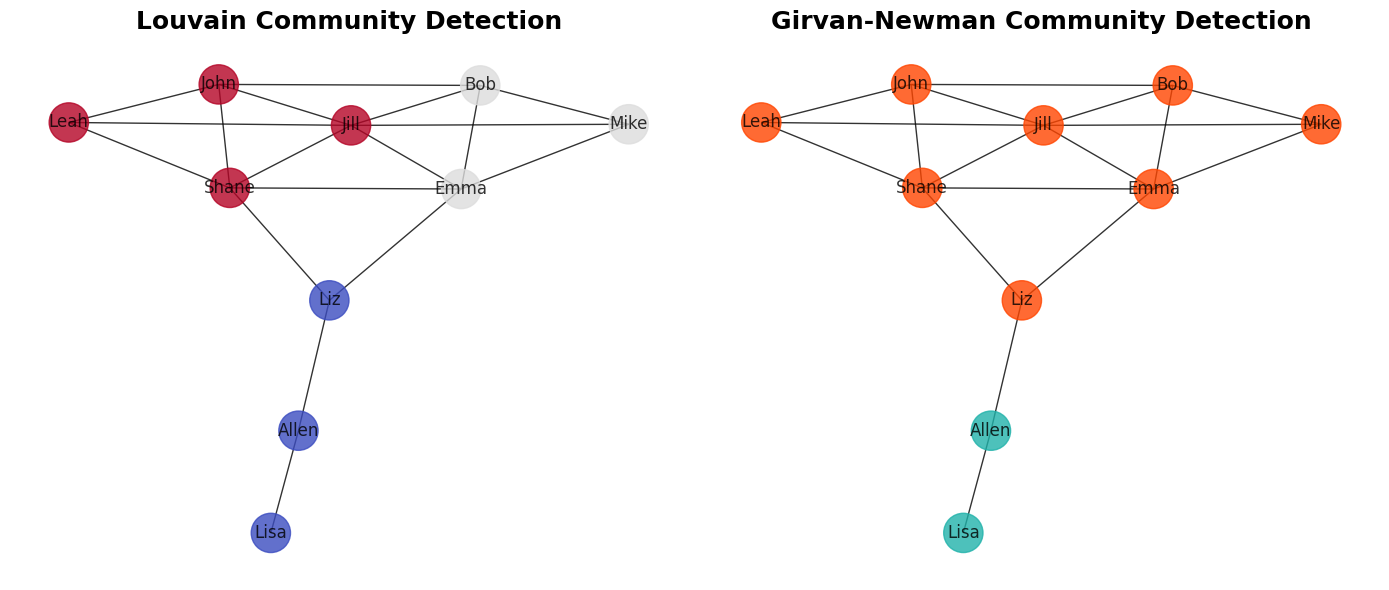

In [242]:
#Layout for visualization
pos = nx.spring_layout(G)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

#Louvain community detection
louvain_communities = nx.community.louvain_communities(G)
louvain_partition = community_louvain.best_partition(G)
node_groups = list((louvain_communities))
cmap = cm.get_cmap('coolwarm', max(louvain_partition.values()) + 1)
axs[0].set_title("Louvain Community Detection", fontweight='bold', fontsize=18)
nx.draw(G, pos=pos, ax=axs[0], node_size=800, with_labels=True, alpha=0.8, node_color=[cmap(color) for node, color in louvain_partition.items()])

#Girvan-Newman community detection
girvan_newman_communities = nx.community.girvan_newman(G)
node_groups = list(next(girvan_newman_communities))
axs[1].set_title("Girvan-Newman Community Detection", fontweight='bold', fontsize=18)
nx.draw(G, pos=pos, ax=axs[1], node_size=800, with_labels=True, alpha=0.8, node_color=['orangered' if node in node_groups[0] else 'lightseagreen' for node in G.nodes()])

plt.tight_layout()
plt.show()

From the results above, we can see that the Louvain algorithm detected three communities:

* Community 1: Lisa, Allen, Liz
* Communtiy 2: Emma, Jill, Mike, Bob
* Community 3: Shane, Leah, John

On the other hand, the Girvan-Newman detected two communities:

* Community 1: Lisa, Allen
* Community 2: Liz, Shane, Emma, Jill, John, Leah, Bob, Mike

Both of these algorithms were able to uncover the subsets of a network using different approaches. However, to quantify these community separation, we can calculate their modularities below.

## **Modularity**

In [243]:
#Louvain modularity
modularity_lv = nx.community.modularity(G, louvain_communities)

#Girvan-Newman modularity
modularity_gn = 0
for com in nx.community.girvan_newman(G):
  modularity = nx.community.modularity(G, com)
  modularity_gn+=modularity

#Results
print(f'Louvain modularity: {modularity_lv}')
print(f'Girvan-Newman modularity: {modularity_gn}')

Louvain modularity: 0.2222222222222222
Girvan-Newman modularity: 0.35185185185185175


We see from the results above that the Girvan-Newman algorithm has a higher modularity score. A higher modularity score indicates better separation of the communities.

# **Acknowledgements**

I would like to thank Sean Manlinguez from AP 157 TX-1 for helping me fix my code for the manual calculation of betweenness centrality. I intially struggled with the flow of the code but with his help I was able to make it work.